In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [12]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99 wala imputation:  951.7275570187188
Age Variance after -1 wala imputation:  318.0896202624488
Original Fare variable variance:  2448.1979137063163
Fare Variance after 999 wala imputation:  47219.202652176304
Fare Variance after -1 wala imputation:  2378.5676784883494


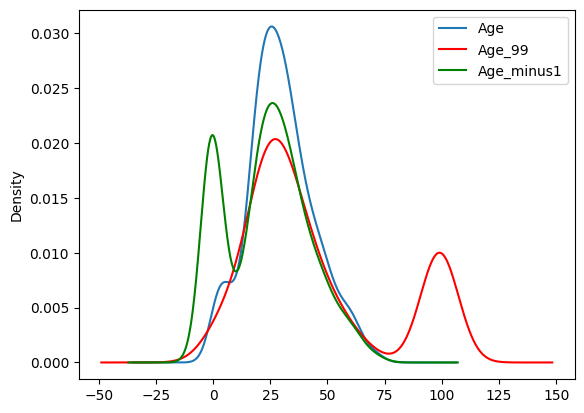

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

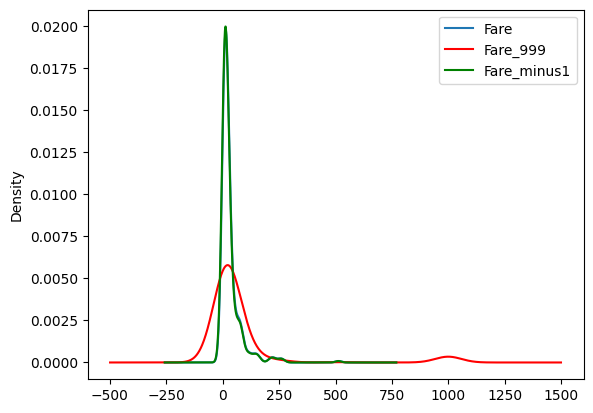

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [16]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1,Fare_999
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,73.268412,63.321188,162.793430
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,16.051452,16.553989,11.528625
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-100.878826,-94.317400,-159.931663
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,128.692715,114.394141,257.379887
Fare_99,73.268412,2448.197914,16.051452,-100.878826,128.692715,2536.077343,2216.958409,5408.147749
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,2216.958409,2378.567678,762.474982
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,5408.147749,762.474982,47219.202652


### Using sklearn

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)


In [19]:
trf = ColumnTransformer([
    ('imputer1', imputer1,['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [20]:
trf.fit_transform(X_train)

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

In [21]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [22]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

In [25]:
X_final = pd.DataFrame(X_train, columns=['Age','Fare','Family'])
X_final.head()

,Age,Fare,Family
0,40.0,27.7208,0.0
1,4.0,16.7000,2.0
2,47.0,9.0000,0.0
3,9.0,31.3875,6.0
4,20.0,9.8458,0.0


In [26]:
X_final.isnull().sum()

Age       0
Fare      0
Family    0
dtype: int64